<a href="https://colab.research.google.com/github/fakehaa/ANLP-Labs/blob/main/ANLP_lab2_spam_nltk_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam detection for emails

In [ ]:
#imports
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
#data loading
data = pd.read_csv("email_spam.csv")
data.head(5)

,email,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [ ]:
data.columns

Index(['email', 'label'], dtype='object')

In [ ]:
#checking distribution of the dataset
data.groupby('label').count()

,email
label,
ham,8336
spam,9494


In [ ]:
#renaming columns
data.columns = ['text', 'label']
# creating dummy variables for spam and ham
y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values
data.head(5)

,text,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [ ]:
print(len(data))

17830


In [ ]:
print(len(data['label'].value_counts().index))
print(len(data['label'].value_counts()))

2
2


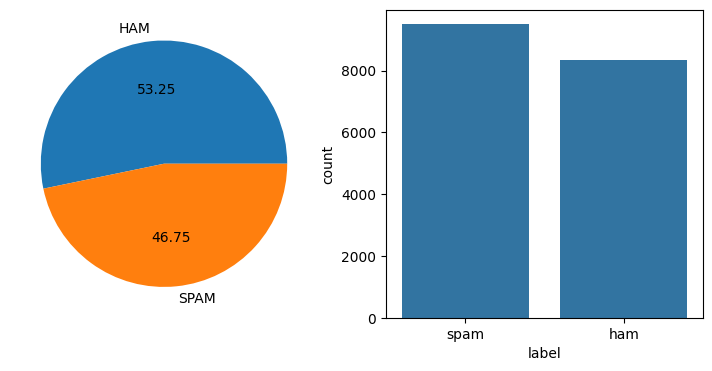

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of distribution of classes
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(data['label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=data['label'].value_counts().index, y=data['label'].value_counts())
plt.show()


In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re
#cleaning dataset
tk = TweetTokenizer()                                     #creating object for tokenizer
stemmer = SnowballStemmer('english')                      #creating object for stemmer

corpus = []
for i in range(0,len(data)):                              #len(data) indicates no. of rows or lines to process
  message = re.sub('[^a-zA-Z]', ' ', data['text'][i])     #replace any value other than a-z or A-Z with space
  message = re.sub("Subject", "", message)
  message = message.lower()                               #lowercase all words in a row
  message =tk.tokenize(message)
  message = [stemmer.stem(word) for word in message if not\
             word in set(stopwords)]                       #stemming if word not present in stop words
  message = ' '.join(message)                              #joining list of words to form a sentence
  corpus.append(message)


In [ ]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)

                                                    text
0      cam babe look look companion friendship love d...
1      want make money order confirm order ship janua...
2           food thought join take free tour click remov
3      pharmaci ta would want cheap perscript http ww...
4      bigger breast pill imag load cli k info ship s...
...                                                  ...
17825  consent need desk honor chairman local everyth...
17826  see page save thousand e help get e cheap zv s...
17827  go time aaron offload misplac shove withstand ...
17828  extra time ejacul within minut penetr must ord...
17829  one time check rock money paper space winter u...

[17830 rows x 1 columns]


In [ ]:
data= df.join(data["label"], how="outer")
print(data)

                                                    text label
0      cam babe look look companion friendship love d...  spam
1      want make money order confirm order ship janua...  spam
2           food thought join take free tour click remov  spam
3      pharmaci ta would want cheap perscript http ww...  spam
4      bigger breast pill imag load cli k info ship s...  spam
...                                                  ...   ...
17825  consent need desk honor chairman local everyth...  spam
17826  see page save thousand e help get e cheap zv s...  spam
17827  go time aaron offload misplac shove withstand ...  spam
17828  extra time ejacul within minut penetr must ord...  spam
17829  one time check rock money paper space winter u...  spam

[17830 rows x 2 columns]


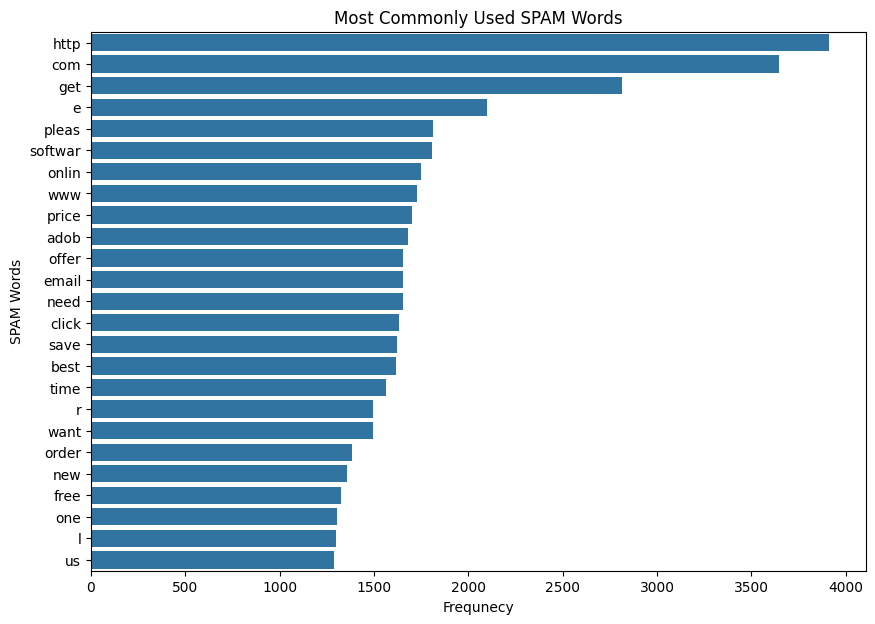

In [ ]:
#Distribution of most commonly used SPAM words
#create spam corpus which will holds all Spam words
from collections import Counter
spam_corpus = []
for msg in data[data['label'] == "spam"]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used SPAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("SPAM Words")
plt.show()


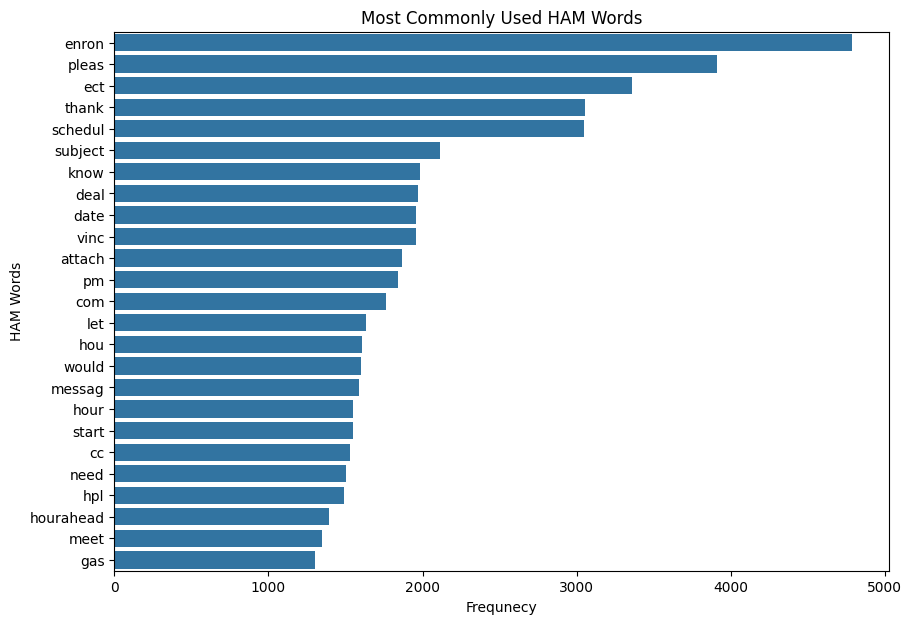

In [ ]:
#Distribution of most commonly used HAM words
#create spam corpus which will holds all ham words
ham_corpus = []
for msg in data[data['label'] == "ham"]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used HAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("HAM Words")
plt.show()


## Building Simple Classifier using keras and sklearn libraries

In [ ]:
#Neural Networks
!pip install keras

In [ ]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [ ]:
words=[]
for sent in corpus:
    sent_token =tk.tokenize(sent)
    words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20, random_state = 0)


In [ ]:
print(len(words))
# prints out the number of message arrays
# (each containing the cleaned up words in the message)

17830


In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)


In [ ]:
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
# define the model
model = Sequential()
model.add(InputLayer(input_shape=(100,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2020      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_seq_padded, y_train,
                   epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10
357/357 [==============================] - 5s 11ms/step - loss: 0.7272 - accuracy: 0.5208 - val_loss: 0.7211 - val_accuracy: 0.5117
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 0.7025 - accuracy: 0.5359 - val_loss: 0.7051 - val_accuracy: 0.5247
Epoch 3/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5411 - val_loss: 0.6982 - val_accuracy: 0.5356
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5568 - val_loss: 0.6889 - val_accuracy: 0.5450
Epoch 5/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5514 - val_loss: 0.6920 - val_accuracy: 0.5296
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5530 - val_loss: 0.6851 - val_accuracy: 0.5531
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5653 - val_loss: 0.6835 - val_accuracy: 0.5591
Epoch

In [ ]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5533
Test results - Accuracy:  55.33%


In [ ]:
#enchancing model accuracy
model2 = Sequential()
model2.add(InputLayer(input_shape=(100,)))
model2.add(Dense(20, activation='sigmoid'))
model2.add(Dense(20, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                2020      
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2461 (9.61 KB)
Trainable params: 2461 (9.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.fit(X_train_seq_padded, y_train,
                   epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10
357/357 [==============================] - 3s 4ms/step - loss: 0.7072 - accuracy: 0.5195 - val_loss: 0.6868 - val_accuracy: 0.5314
Epoch 2/10
357/357 [==============================] - 2s 5ms/step - loss: 0.6837 - accuracy: 0.5521 - val_loss: 0.6814 - val_accuracy: 0.5689
Epoch 3/10
357/357 [==============================] - 2s 4ms/step - loss: 0.6803 - accuracy: 0.5622 - val_loss: 0.6778 - val_accuracy: 0.5629
Epoch 4/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6759 - accuracy: 0.5712 - val_loss: 0.6745 - val_accuracy: 0.5731
Epoch 5/10
357/357 [==============================] - 2s 5ms/step - loss: 0.6741 - accuracy: 0.5723 - val_loss: 0.6722 - val_accuracy: 0.5780
Epoch 6/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6743 - accuracy: 0.5740 - val_loss: 0.6728 - val_accuracy: 0.5857
Epoch 7/10
357/357 [==============================] - 1s 3ms/step - loss: 0.6742 - accuracy: 0.5807 - val_loss: 0.6704 - val_accuracy: 0.5868
Epoch 

In [ ]:
test_results = model2.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 [==============================] - 1s 8ms/step - loss: 0.6847 - accuracy: 0.5524
Test results - Accuracy:  55.24%


In [ ]:
#model 3 with 20 units and 40 epochs
model3 = Sequential()
model3.add(InputLayer(input_shape=(100,)))
model3.add(Dense(20, activation='sigmoid'))
model3.add(Dense(20, activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                2020      
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2461 (9.61 KB)
Trainable params: 2461 (9.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.fit(X_train_seq_padded, y_train,
                   epochs=40, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/40
357/357 [==============================] - 3s 8ms/step - loss: 0.6834 - accuracy: 0.5574 - val_loss: 0.6841 - val_accuracy: 0.5668
Epoch 2/40
357/357 [==============================] - 2s 6ms/step - loss: 0.6814 - accuracy: 0.5660 - val_loss: 0.6803 - val_accuracy: 0.5566
Epoch 3/40
357/357 [==============================] - 3s 7ms/step - loss: 0.6787 - accuracy: 0.5706 - val_loss: 0.6794 - val_accuracy: 0.5577
Epoch 4/40
357/357 [==============================] - 3s 8ms/step - loss: 0.6784 - accuracy: 0.5746 - val_loss: 0.6815 - val_accuracy: 0.5601
Epoch 5/40
357/357 [==============================] - 3s 8ms/step - loss: 0.6773 - accuracy: 0.5762 - val_loss: 0.6796 - val_accuracy: 0.5689
Epoch 6/40
357/357 [==============================] - 2s 4ms/step - loss: 0.6789 - accuracy: 0.5730 - val_loss: 0.6797 - val_accuracy: 0.5748
Epoch 7/40
357/357 [==============================] - 1s 3ms/step - loss: 0.6745 - accuracy: 0.5817 - val_loss: 0.6751 - val_accuracy: 0.5780
Epoch 

In [ ]:
test_results = model3.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 [==============================] - 1s 5ms/step - loss: 0.6744 - accuracy: 0.5886
Test results - Accuracy:  58.86%


In [ ]:
#model 4 with 2000 units and 40 epochs
model4 = Sequential()
model4.add(InputLayer(input_shape=(100,)))
model4.add(Dense(2000, activation='sigmoid'))
model4.add(Dense(100, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2000)              202000    
                                                                 
 dense_12 (Dense)            (None, 100)               200100    
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 402201 (1.53 MB)
Trainable params: 402201 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.fit(X_train_seq_padded, y_train,
                   epochs=40, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/40
357/357 [==============================] - 6s 10ms/step - loss: 0.6651 - accuracy: 0.5924 - val_loss: 0.6529 - val_accuracy: 0.6008
Epoch 2/40
357/357 [==============================] - 3s 9ms/step - loss: 0.6338 - accuracy: 0.6262 - val_loss: 0.6337 - val_accuracy: 0.6169
Epoch 3/40
357/357 [==============================] - 4s 10ms/step - loss: 0.6219 - accuracy: 0.6422 - val_loss: 0.6220 - val_accuracy: 0.6467
Epoch 4/40
357/357 [==============================] - 4s 12ms/step - loss: 0.6155 - accuracy: 0.6453 - val_loss: 0.6169 - val_accuracy: 0.6456
Epoch 5/40
357/357 [==============================] - 5s 14ms/step - loss: 0.6101 - accuracy: 0.6492 - val_loss: 0.6220 - val_accuracy: 0.6491
Epoch 6/40
357/357 [==============================] - 6s 17ms/step - loss: 0.6055 - accuracy: 0.6584 - val_loss: 0.6243 - val_accuracy: 0.6372
Epoch 7/40
357/357 [==============================] - 3s 9ms/step - loss: 0.5949 - accuracy: 0.6682 - val_loss: 0.6238 - val_accuracy: 0.6257
E

In [ ]:
test_results = model4.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.6270
Test results - Accuracy:  62.70%


##testing with SMS

In [ ]:
import pandas as pd

df = pd.read_csv("sms_spam.csv")

df.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
new_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
new_df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [ ]:
#checking distribution of the dataset
new_df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [ ]:
#renaming columns
df.columns = ['v1', 'v2']
# creating dummy variables for spam and ham
y=pd.get_dummies(df['v2'])
y=y.iloc[:,1].values
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#renaming columns
new_df.columns = ['v1', 'v2']
# creating dummy variables for spam and ham
y=pd.get_dummies(new_df['v2'])
y=y.iloc[:,1].values
new_df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(len(df))

5572


In [ ]:
print(len(new_df))

5572


In [ ]:
print(len(new_df['v2'].value_counts().index))
print(len(new_df['v2'].value_counts()))

5169
5169


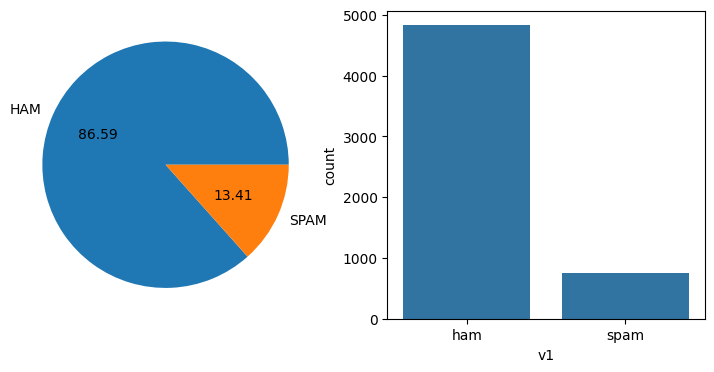

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of distribution of classes
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(new_df['v1'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=new_df['v1'].value_counts().index, y=new_df['v1'].value_counts())
plt.show()


In [ ]:
new_df.head()

In [ ]:
#direct copy paste from sheet
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re
#cleaning dataset
tk = TweetTokenizer()                                     #creating object for tokenizer
stemmer = SnowballStemmer('english')                      #creating object for stemmer

corpus = []
for i in range(0,len(new_df)):                              #len(data) indicates no. of rows or lines to process
  message = re.sub('[^a-zA-Z]', ' ', new_df['v2'][i])     #replace any value other than a-z or A-Z with space
  message = re.sub("Subject", "", message)
  message = message.lower()                               #lowercase all words in a row
  message =tk.tokenize(message)
  message = [stemmer.stem(word) for word in message if not\
             word in set(stopwords)]                       #stemming if word not present in stop words
  message = ' '.join(message)                              #joining list of words to form a sentence
  corpus.append(message)


KeyError: 'v2'

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')

import re

#cleaning dataset
tk = TweetTokenizer()                                     #creating object for tokenizer
stemmer = SnowballStemmer('english')                      #creating object for stemmer

corpus = []
for i in range(0,len(new_df)):                              #len(data) indicates no. of rows or lines to process
  message = re.sub('[^a-zA-Z]', ' ', new_df['v2'][i])     #replace any value other than a-z or A-Z with space
  message = re.sub("Subject", "", message)
  message = message.lower()                               #lowercase all words in a row
  message =tk.tokenize(message)
  message = [stemmer.stem(word) for word in message if not\
             word in set(stopwords)]                       #stemming if word not present in stop words
  message = ' '.join(message)                              #joining list of words to form a sentence
  corpus.append(message)


changed code a little

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stop_words = nltk.corpus.stopwords.words('english')
import re
#cleaning dataset
tk = TweetTokenizer()                                     #creating object for tokenizer
stemmer = SnowballStemmer('english')                      #creating object for stemmer

corpus = []
for i in range(len(new_df)):
    message = re.sub('[^a-zA-Z]', ' ', new_df['v2'][i])  # Remove non-alphabetic characters
    message = re.sub("Subject", "", message)           # Remove "Subject" if present
    message = message.lower()                          # Convert to lowercase
    words = tk.tokenize(message)                       # Tokenize the message
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming and remove stopwords
    cleaned_message = ' '.join(stemmed_words)          # Join cleaned words back into a sentence
    corpus.append(cleaned_message)

# Print the cleaned messages
for message in corpus:
    print(message)


In [ ]:
df1 = pd.DataFrame({'text':corpus})
print (df1)

                                                   text
0     go jurong point crazi avail bugi n great world...
1                                 ok lar joke wif u oni
2     free entri wkli comp win fa cup final tkts st ...
3                   u dun say earli hor u c alreadi say
4                  nah think goe usf live around though
...                                                 ...
5567  nd time tri contact u u pound prize claim easi...
5568                              b go esplanad fr home
5569                                  piti mood suggest
5570  guy bitch act like interest buy someth els nex...
5571                                     rofl true name

[5572 rows x 1 columns]


In [ ]:
new_df= df1.join(new_df["v1"], how="outer")
print(new_df)

                                                   text    v1
0     go jurong point crazi avail bugi n great world...   ham
1                                 ok lar joke wif u oni   ham
2     free entri wkli comp win fa cup final tkts st ...  spam
3                   u dun say earli hor u c alreadi say   ham
4                  nah think goe usf live around though   ham
...                                                 ...   ...
5567  nd time tri contact u u pound prize claim easi...  spam
5568                              b go esplanad fr home   ham
5569                                  piti mood suggest   ham
5570  guy bitch act like interest buy someth els nex...   ham
5571                                     rofl true name   ham

[5572 rows x 2 columns]


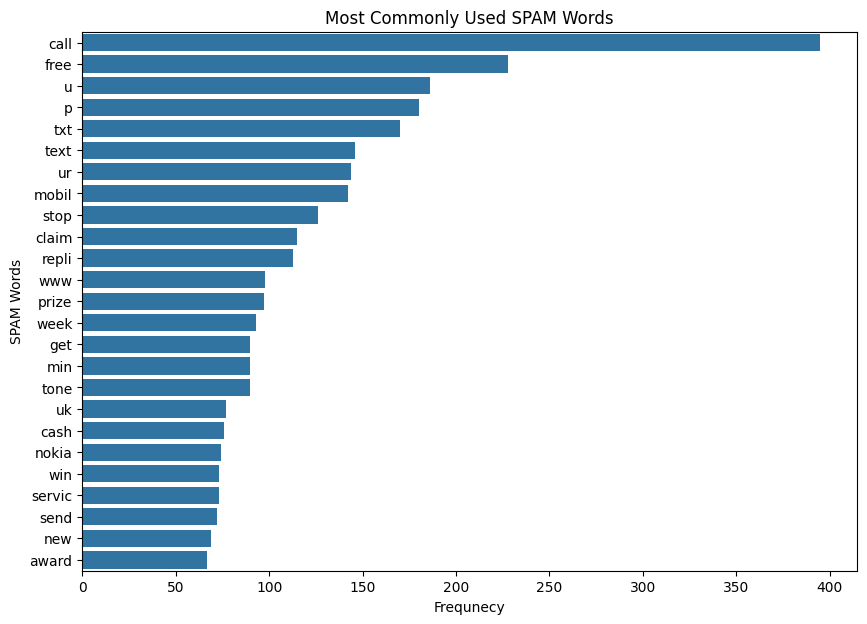

In [ ]:
#Distribution of most commonly used SPAM words
#create spam corpus which will holds all Spam words
from collections import Counter
spam_corpus = []
for msg in new_df[new_df['v1'] == "spam"]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used SPAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("SPAM Words")
plt.show()


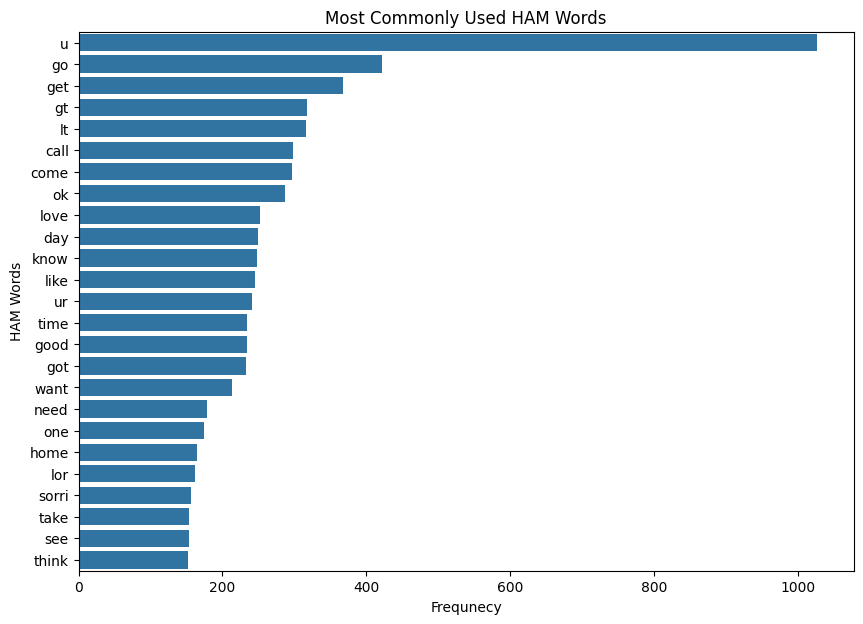

In [ ]:
#Distribution of most commonly used HAM words
#create spam corpus which will holds all ham words
ham_corpus = []
for msg in new_df[new_df['v1'] == "ham"]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used HAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("HAM Words")
plt.show()


In [ ]:
from sklearn import

In [ ]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [ ]:
words=[]
for sent in corpus:
    sent_token =tk.tokenize(sent)
    words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20, random_state = 0)


In [ ]:
print(len(words))
# prints out the number of message arrays
# (each containing the cleaned up words in the message)

5572


In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)


In [ ]:
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
# define the model
models = Sequential()
models.add(InputLayer(input_shape=(100,)))
models.add(Dropout(0.4, input_shape=(1,)))
models.add(Dense(20, activation='sigmoid'))
models.add(Dense(1, activation='sigmoid'))


In [ ]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
models.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
models.fit(X_train_seq_padded, y_train,
                   epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 0.2540 - accuracy: 0.9619 - val_loss: 0.0962 - val_accuracy: 0.9989
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9986 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9997 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9997 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9997 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9997 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9997 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 

In [ ]:
# Test the modelon the test data after training
test_results = models.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Test results - Accuracy:  100.00%
